<a href="https://colab.research.google.com/github/thecrazyphysicist369/strategic-Covid19-testing/blob/main/version_1/v1_n_neighbor_with_varying_n_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#n-Neighbor Testing in Small World Network
## **n** - can be toggled from 1 to 10.

In [ ]:
#Importing all the necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import time
#import widget

In [ ]:
#Susceptible State
Susceptible = np.array([[1, 0],
                        [0, 1]])

#Exposed State
Exposed = np.array([[1, 1],
                    [0, 0]])

#Infected State
Infected = np.array([[1, 1],
                    [0, 0]])

#Recovered State
Recovered = np.array([[0, 0],
                      [0, 0]])

#vertex generator generates each individual with their properties
def gen_vertex(n):
    ver_list=[]
    c=0

    for i in range(n):
      vertex = {
                'index': c, 			# the unique index of the voter
                'state' : Susceptible, 
                'connected': []   # the small world connections between the individuals
                }
      ver_list.append(vertex)
      c+=1
    return ver_list

#Generating the Small World Network
def gen_graph(n, k, p):
   population = gen_vertex(n)
   G = nx.watts_strogatz_graph(n, k, p, seed=10)
   neighbor = []
   for node in list(sorted(G.nodes())):
   	neighbours = list(nx.all_neighbors(G, node))
   	neighbor.append(neighbours)
   for i in range(n):
   	population[i]['connected']=neighbor[i]
   #print(conlist)
   return population

#this is to expose n individuals from the population to the virus
#1/5th of the exposed individuals will be infected in random
def expose_population(n, population):
  inf_list = []
  limit = len(population)-1
  for i in range(n):
    index = random.randint(0, limit)
    inf_list.append(index)
    population[index]['state'] = Exposed
  return population, inf_list

In [ ]:
gen_graph(100, 5, 0.5)

[{'connected': [1, 99, 98, 22, 70], 'cont_level': 15, 'index': 0},
 {'connected': [0, 3, 73], 'cont_level': 9, 'index': 1},
 {'connected': [4, 59], 'cont_level': 13, 'index': 2},
 {'connected': [4, 1, 5], 'cont_level': 13, 'index': 3},
 {'connected': [3, 5, 2, 33, 90, 85], 'cont_level': 0, 'index': 4},
 {'connected': [4, 6, 3, 46], 'cont_level': 2, 'index': 5},
 {'connected': [5, 8, 66, 57, 72], 'cont_level': 9, 'index': 6},
 {'connected': [9, 31], 'cont_level': 2, 'index': 7},
 {'connected': [9, 6, 28, 76, 44], 'cont_level': 14, 'index': 8},
 {'connected': [8, 10, 7, 75], 'cont_level': 10, 'index': 9},
 {'connected': [9, 53, 26], 'cont_level': 8, 'index': 10},
 {'connected': [12, 13, 77], 'cont_level': 8, 'index': 11},
 {'connected': [11, 13, 14, 95], 'cont_level': 0, 'index': 12},
 {'connected': [12, 11, 36, 59], 'cont_level': 4, 'index': 13},
 {'connected': [15, 12, 16, 95], 'cont_level': 7, 'index': 14},
 {'connected': [14, 17, 22], 'cont_level': 13, 'index': 15},
 {'connected': [1

In [ ]:
#n neighbour testing
def n_neighbor_testing(pop, tpm, n):
  if (n>0):  
    numbers = len(pop)
    test = int((tpm*numbers)/1000000)
    for i in range(test):
      index = random.randint(0, numbers - 1)
      pop[index]['state'] = Recovered
      print(n)
      for neighbor in pop[index]['connected']:
        n_neighbor_testing(pop, tpm, n-1)
        #if np.array_equal(pop[neighbor]['state'],Exposed):
          #pop[neighbor]['state'] = Recovered
  return pop



In [ ]:
def days(pop, tpm):
  list_S = [] #list for Susceptible Individuals
  list_E = [] #list for Exposed Individuals
  list_I = [] #list for Infected Individuals
  list_R = [] #list for Recovered Individuals

  #Adding person to the respective lists based on their status
  for person in pop:
    state = person['state']
    if np.array_equal(state, Susceptible):
      list_S.append(person['index'])
    elif np.array_equal(state, Exposed):
      list_E.append(person['index'])
    elif np.array_equal(state,Recovered):
      list_R.append(person['index'])


  #print(list_S)
  #print(list_E)
  #print(list_R)
  #print(list_I)



  #Infecting 1/5th of exposed population
  ex_num = len(list_E)
  num = int(ex_num/5)
  for i in range(num):
    r = random.randint(0,ex_num-1)
    list_I.append(list_E[r])
    list_E.pop(r)
    ex_num = len(list_E)


  #print(pop[:20])

  #Spreading the Virus
  for i in list_I:
    friends = pop[i]['connected']  
    for contacts in friends:
      A = pop[contacts]['state']
      B = pop[i]['state']
      pop[contacts]['state'] = B.dot(A)

  #print(pop[:20])

  #Removing the duplicates from the list
  list_S = list(dict.fromkeys(list_S))
  list_E = list(dict.fromkeys(list_E))
  list_I = list(dict.fromkeys(list_I))
  list_R = list(dict.fromkeys(list_R))

  #testing the population
  #pop = random_testing(pop, tpm)
  #pop = targeted_testing(pop,tpm,list_I)
  pop = n_neighbor_testing(pop, tpm, n)

  return (pop, list_S, list_E, list_I, list_R)

Streaming output truncated to the last 5000 lines.
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

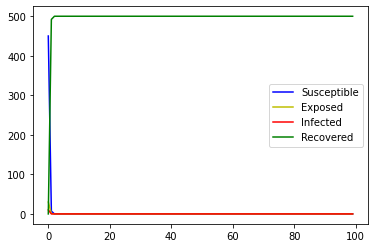

In [ ]:
population_size = 500 #int(input("Size of population : "))

k = 5 # int(input("\nk nearest neighbors : "))

p = 0.5 #float(input("\nProbablity of the contacts : "))

tpm = 10000 #int(input("\nTests per million population : "))

iterations = 100 #int(input("\nNumber of days the model to run : "))

n = 3
#Generating the small world network
population = gen_graph( population_size, k, p)

#Exposing the population
#li is the list of the first round of exposed population
population,li = expose_population(50, population)


#Number of days the simulation need to run
count = np.arange(iterations)


# List to contain the current data
susp = []
expo = []
infe = []
reco = []

# List of lists to contain all data per day
susp_all = []
expo_all = []
infe_all = []
reco_all = []

#Lists for animation

colors = []

elapsed = 0
# Running the days simulation for given number of days
for j in range (iterations):
	inter = []
	tic = time.time()
	population, sus, exp, inf, rec = days(population, tpm)
	susp.append(len(sus)) #Count of suspected persons per day
	expo.append(len(exp)-len(inf)) #Count of exposed persons per day
	infe.append(len(inf)) #Count of infected persons per day
	reco.append(len(rec)) #Count of recovered persons per day
	toc = time.time()
	one_day = toc - tic
	elapsed += one_day  
	estimate = (iterations * one_day) - (j * one_day)
#	print("Doing ",j,"th iteration. Time :","{:.2f}".format(one_day),
#	      "secs. Elapsed time :","{:.2f}".format(elapsed),"secs. Estimated : ","{:.2f}".format(estimate),"secs")

	'''#These lists are for future use of the codebase
	reco_all.append(rec)  #Index of recovered persons day by day
	susp_all.append(sus)  #Index of susceptible persons day by day
	expo_all.append(exp)  #Index of exposed persons day by day
	infe_all.append(inf)  #Index of infected actors day by day'''

	#This is for the animation part
	for i in sus:
		inter.insert(i,1)
	for i in exp:
		inter.insert(i,2)
	for i in inf:
		inter.insert(i,2)
	for i in rec:
		inter.insert(i,2)
	clip = len(inter)
	del inter[100:clip]
	temp = np.array(inter)
	colors.append(temp)


node_colors = np.array(colors)

plt.plot(count, susp, color='b', label = "Susceptible")
plt.plot(count, expo, color='y', label = "Exposed")
plt.plot(count, infe, color='r', label = "Infected")
plt.plot(count, reco, color='g', label = "Recovered")
plt.legend()
plt.show()


In [ ]:
#This needs to be fixed
pop = widgets.IntSlider(value=5000, 
                      description='population size', 
                      max=100000, 
                      min=10000,
                      step=10000) #population_size
k = widgets.IntSlider(value=10, 
                      description='nearest neighbors', 
                      max=100, 
                      min=0,
                      step=5) #nearest neighbor
p = widgets.FloatSlider(value=0.5,
                        description='probability', 
                        max=1, 
                        min=0, 
                        step=0.1) #probability
iter = widgets.IntSlider(value=100, 
                               description='days', 
                               max=600, 
                               min=0, 
                               step=20)
tpm = widgets.IntSlider(value=1000,
                        description='test per million',
                        max=100000,
                        min=1000,
                        step=1000)
ex = widgets.IntSlider(value=50,
                       description='initial exposed',
                       max=500,
                       min=10,
                       step=10)


def simulation(pop,k,p,iter,tpm,ex):
    #Generating the small world network
    population = gen_graph(pop, k, p)

    #Exposing the population
    #li is the list of the first round of exposed population
    population,li = expose_population(ex, population)


    #Number of days the simulation need to run
    count = np.arange(iter)


    # List to contain the current data
    susp = []
    expo = []
    infe = []
    reco = []
    dead = []


    elapsed = 0
    # Running the days simulation for given number of days
    for j in range (iter):
      inter = []
      tic = time.time()
      population, sus, exp, inf, rec, ded = days(population, tpm)
      susp.append(len(sus)) #Count of suspected persons per day
      expo.append(len(exp)) #Count of exposed persons per day
      infe.append(len(inf)) #Count of infected persons per day
      reco.append(len(rec)) #Count of recovered persons per day
      dead.append(len(ded))
      toc = time.time()
      one_day = toc - tic
      elapsed += one_day
      estimated = elapsed*(iter-j)
      remaining = (iter * one_day) - (j * one_day)
      #print("Doing ",j,"th iteration. Time :","{:.2f}".format(one_day),
       #     "secs. Elapsed time :","{:.2f}".format(elapsed),"secs. Remaining : ","{:.2f}".format(remaining),"secs")
    #progress_bar(estimated,elapsed)
    
    plt.figure(figsize=(20,10))
    plt.plot(count, susp, color='b', label = "Susceptible")
    plt.plot(count, expo, color='y', label = "Exposed")
    plt.plot(count, infe, color='r', label = "Infected")
    plt.plot(count, reco, color='g', label = "Recovered")
    plt.plot(count, dead, color='k', label = "Dead")
    label = "Probability = "+str(p)+". Nearest Neigbours = "+str(k)+"."
    plt.title(label, fontdict=None, loc='center', pad=None)
    plt.legend()
    return()
ui = widgets.HBox([pop,k,p,iter,tpm,ex])
out = widgets.interactive_output(simulation, {'pop':pop,'k':k,'p':p,'iter':iter,'tpm':tpm,'ex':ex})

display(ui, out)

NameError: ignored